In [1]:
import pandas as pd
import matplotlib as mpl
from matplotlib import pyplot as plt


In [99]:
mpl.style.use("seaborn")
colors=["red","blue","green","yellow","pink","brown","grey","gold","aquamarine","violet","orange","beige","lime","magenta","#558dc8","#d37828","#8b81d6","#ae8a27","#684888","#958c43","#8f3859","#605b1d","#d27386","#814621","#af3c35","#c38053"]

mpl.rcParams["axes.prop_cycle"]=mpl.cycler("color",colors)

# Visualization 1 - Genres and Gross
In this notebook we will visualize some information about our data, including distribution of grossing along the years, genre popularity and more.

## Loading the dataframe
We will load the final table refined and use it as our reference from now on

In [3]:
df = pd.read_csv("./output_data/final_table.csv")
df=df.drop("Unnamed: 0",axis=1)
df["genres"]=df["genres"].fillna("NA")

## Creating a list of genres, gross and tickets
We will start simply by create lists of our labels: `tickets` , `genres` , `gross`.


In [4]:
def createYearsPrefixArray(prefix:str,start:int,end:int):
    arr=[]
    for i in range(start,end+1):
        arr.append(f"{prefix}{i}")
    return arr

gross_list =createYearsPrefixArray("gross_",1995,2020)
tickets_list =createYearsPrefixArray("tickets_",1995,2020)
years_list = createYearsPrefixArray("",1995,2020)
genres=set()

for keys in df["genres"].unique().tolist():
    try: 
         for genre in keys.split(","): genres.add(genre)
    except:pass


## Gross - Genre Table.
We would like to examine the genres popularity along the years. To do so we'll create a dataframe that stores each year's gross as a column and the rows would represent the genres. Later we will transpose them to learn further more.

In [5]:
gross_genres_years={}
for gross in gross_list:
    tmp_df = pd.DataFrame()
    genres_dict={}
    for genre in genres:        
        genres_dict[genre]=df[df["genres"].str.contains(genre)][gross].sum()
    gross_genres_years[gross]=genres_dict
gross_genres_years = pd.DataFrame(gross_genres_years)

## Pie Charts!
First we want to _see_ if there are major leads among the genres. We will plot all years' gross in pie charts that is divided by genres.

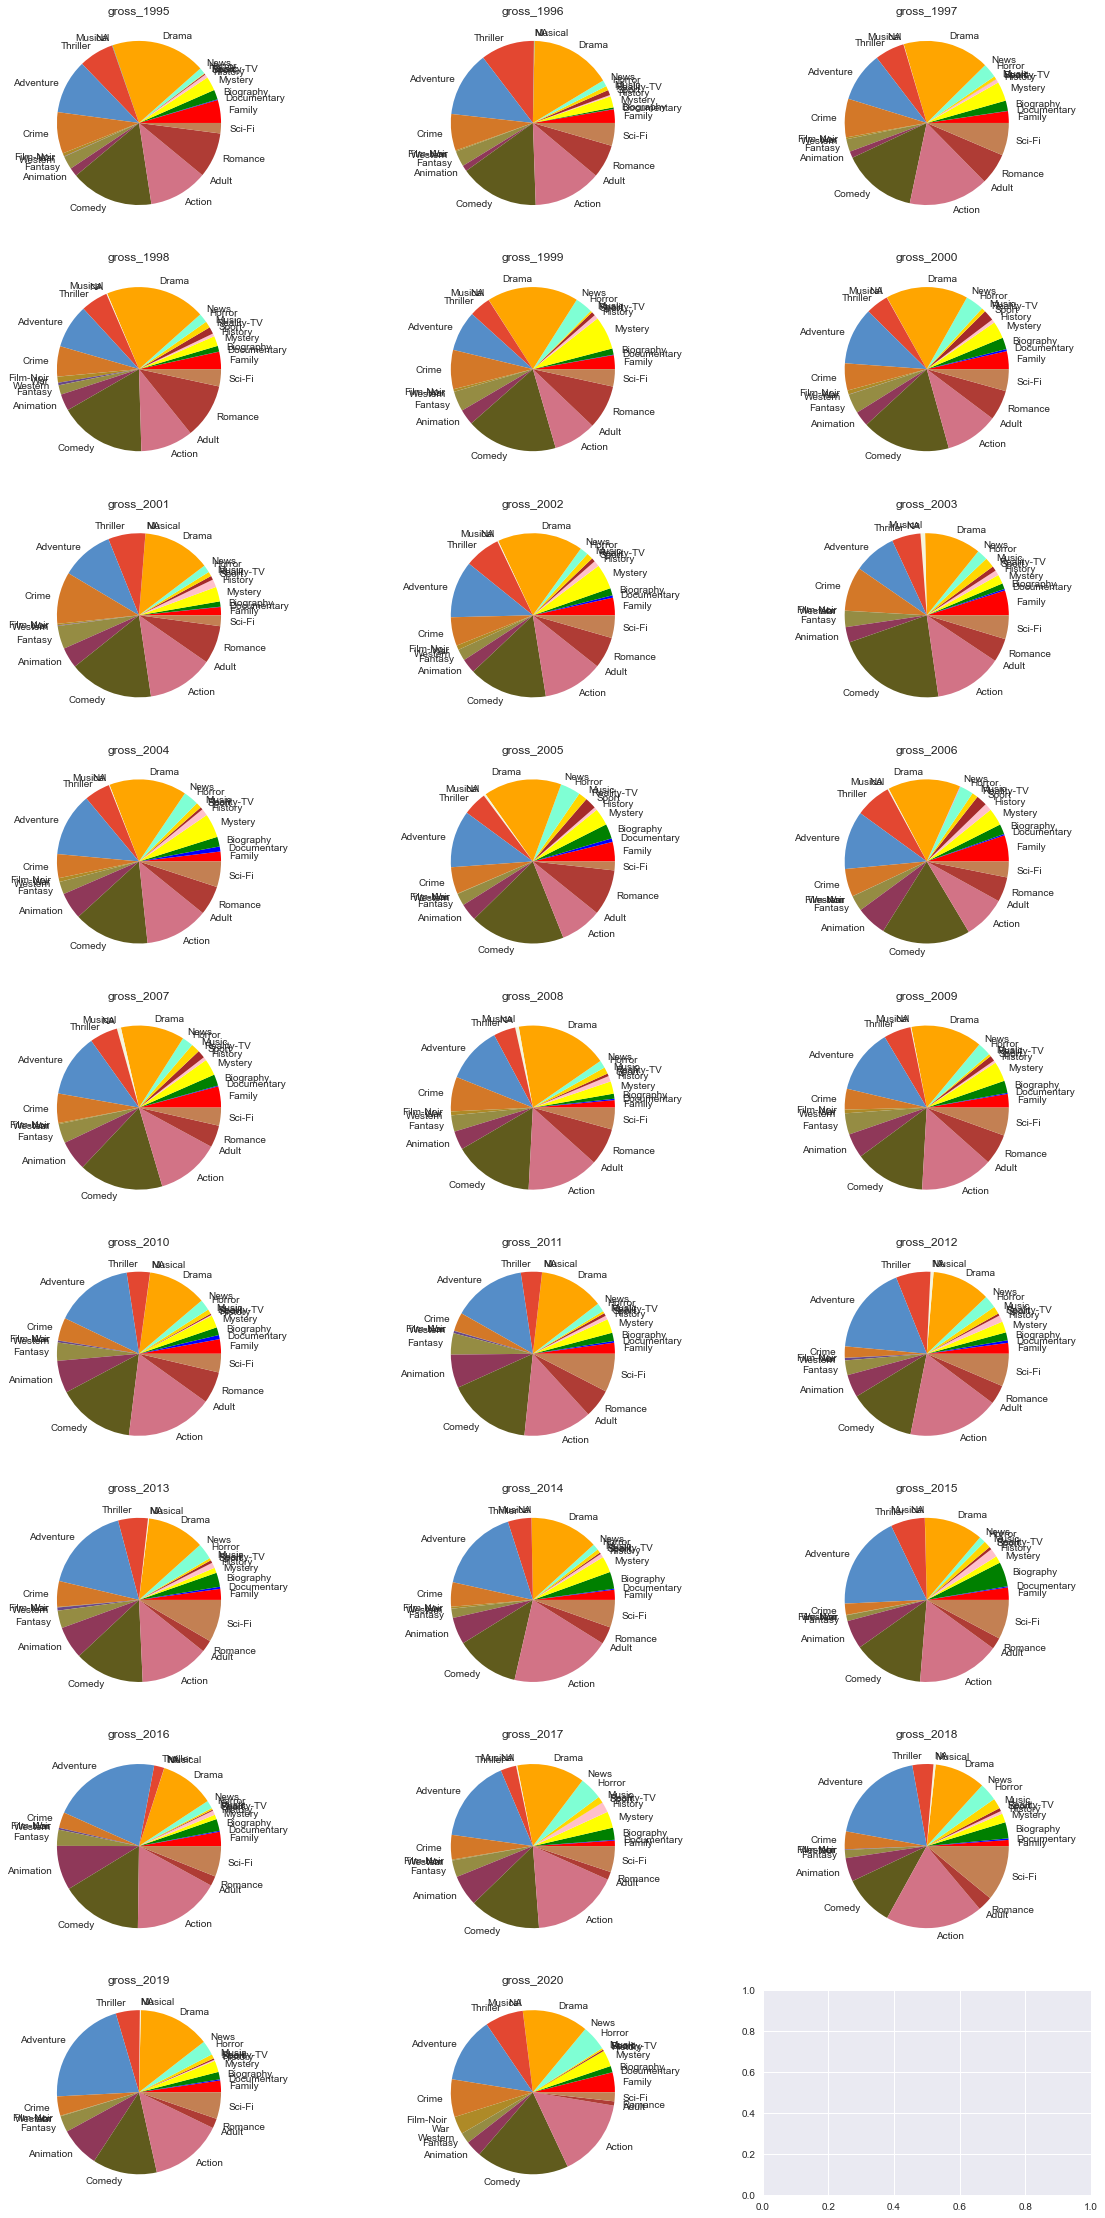

In [100]:
cols = 3
size=20
fig, axes = plt.subplots(len(gross_genres_years)//cols+1,cols, figsize=(size,size*2))
for i ,gross_year in enumerate(gross_list):
    pos = (i//cols,i%cols)
    axes[pos].pie(gross_genres_years[gross_year],labels=genres,colors=colors)
    axes[pos].title.set_text(gross_year)


### Only from seeing - 
we can learn that Comedy, Drama and Adventure were the most popular along all the years.
We would also want to plot all genres in lines where the X Axis is years, the Y Axis is the gross (in $USD) and each line is colored and labeled for a different genre.

In [19]:
def plotGenres(df,genres):
    plt.figure(figsize=(15,10))
    plt.title("Genres Gross Comulative to Years")
    plt.xticks(np.arange(len(years_list)),years_list)
    plt.plot(df[genres])
    plt.legend(genres,loc="upper left")
    plt.show()


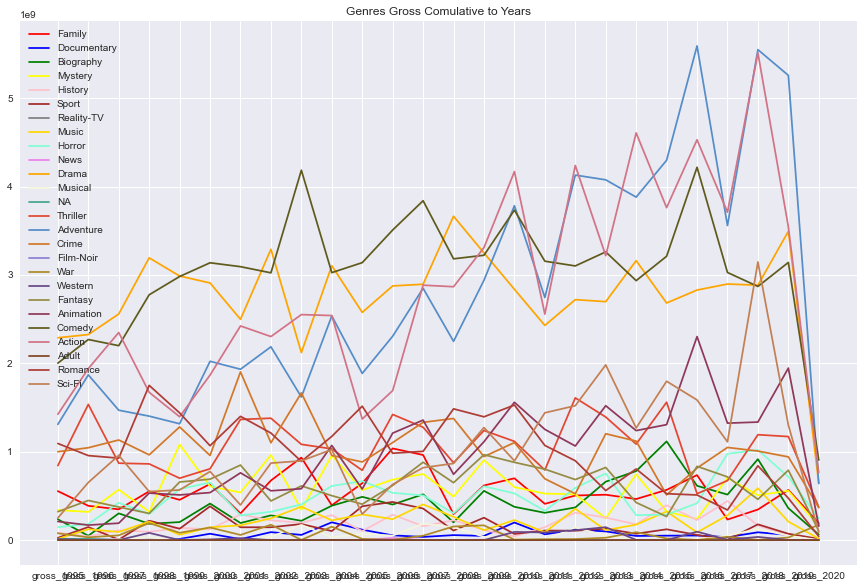

In [101]:
plotGenres(gross_genres_years.transpose(),genres)


## Eye Strain...
Because of the veriety of genres, there's too much on the screen. We want to filter out the best 5 genres of all time.
First we will plot a pie chart of the most popular of all years by gross.

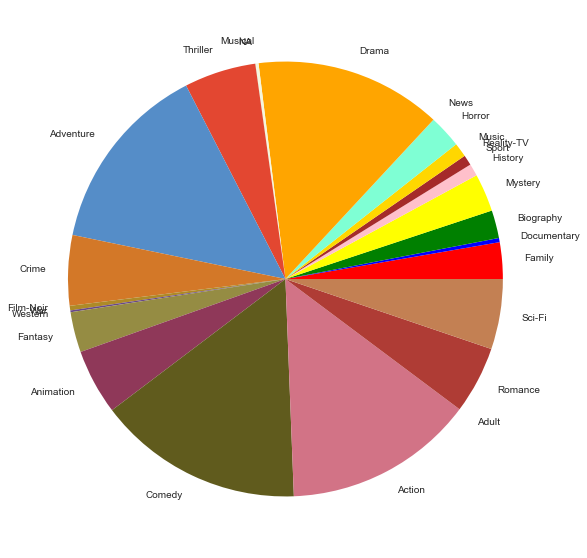

In [102]:
gross_all_time = gross_genres_years.transpose().sum()
fig = plt.figure(figsize=(20,10))
plt.pie(gross_all_time,labels=genres)
plt.show()
top_genres = (gross_all_time.sort_values(ascending=False)[:5]).keys().to_list()


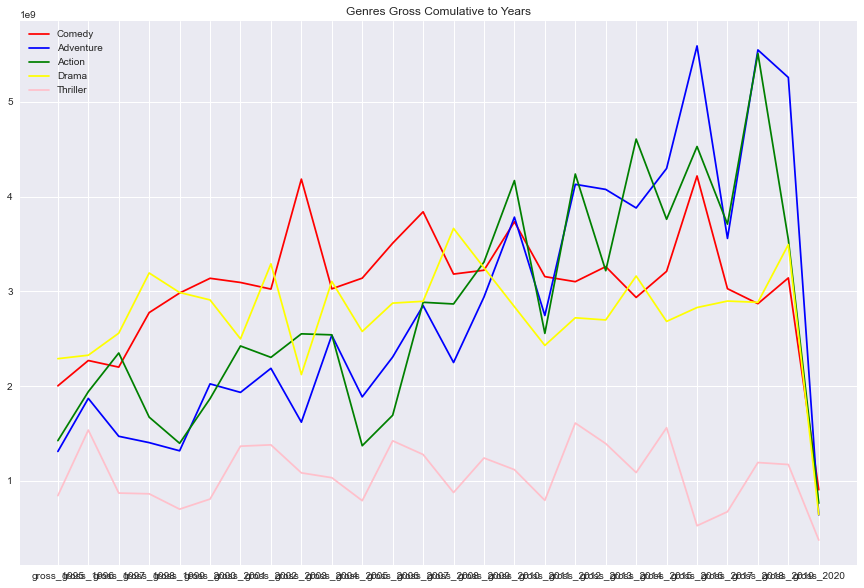

In [103]:
plotGenres(gross_genres_years.transpose(),top_genres)

### Quick Detour
We were skeptic about Comedy and Drama. It seems that they are correlated and act inversly from one another. For example in 2005 Comedy Spiked up and Drama down.
We will scatterplot Comedy with every other genre and normilize with mean/std normalization.

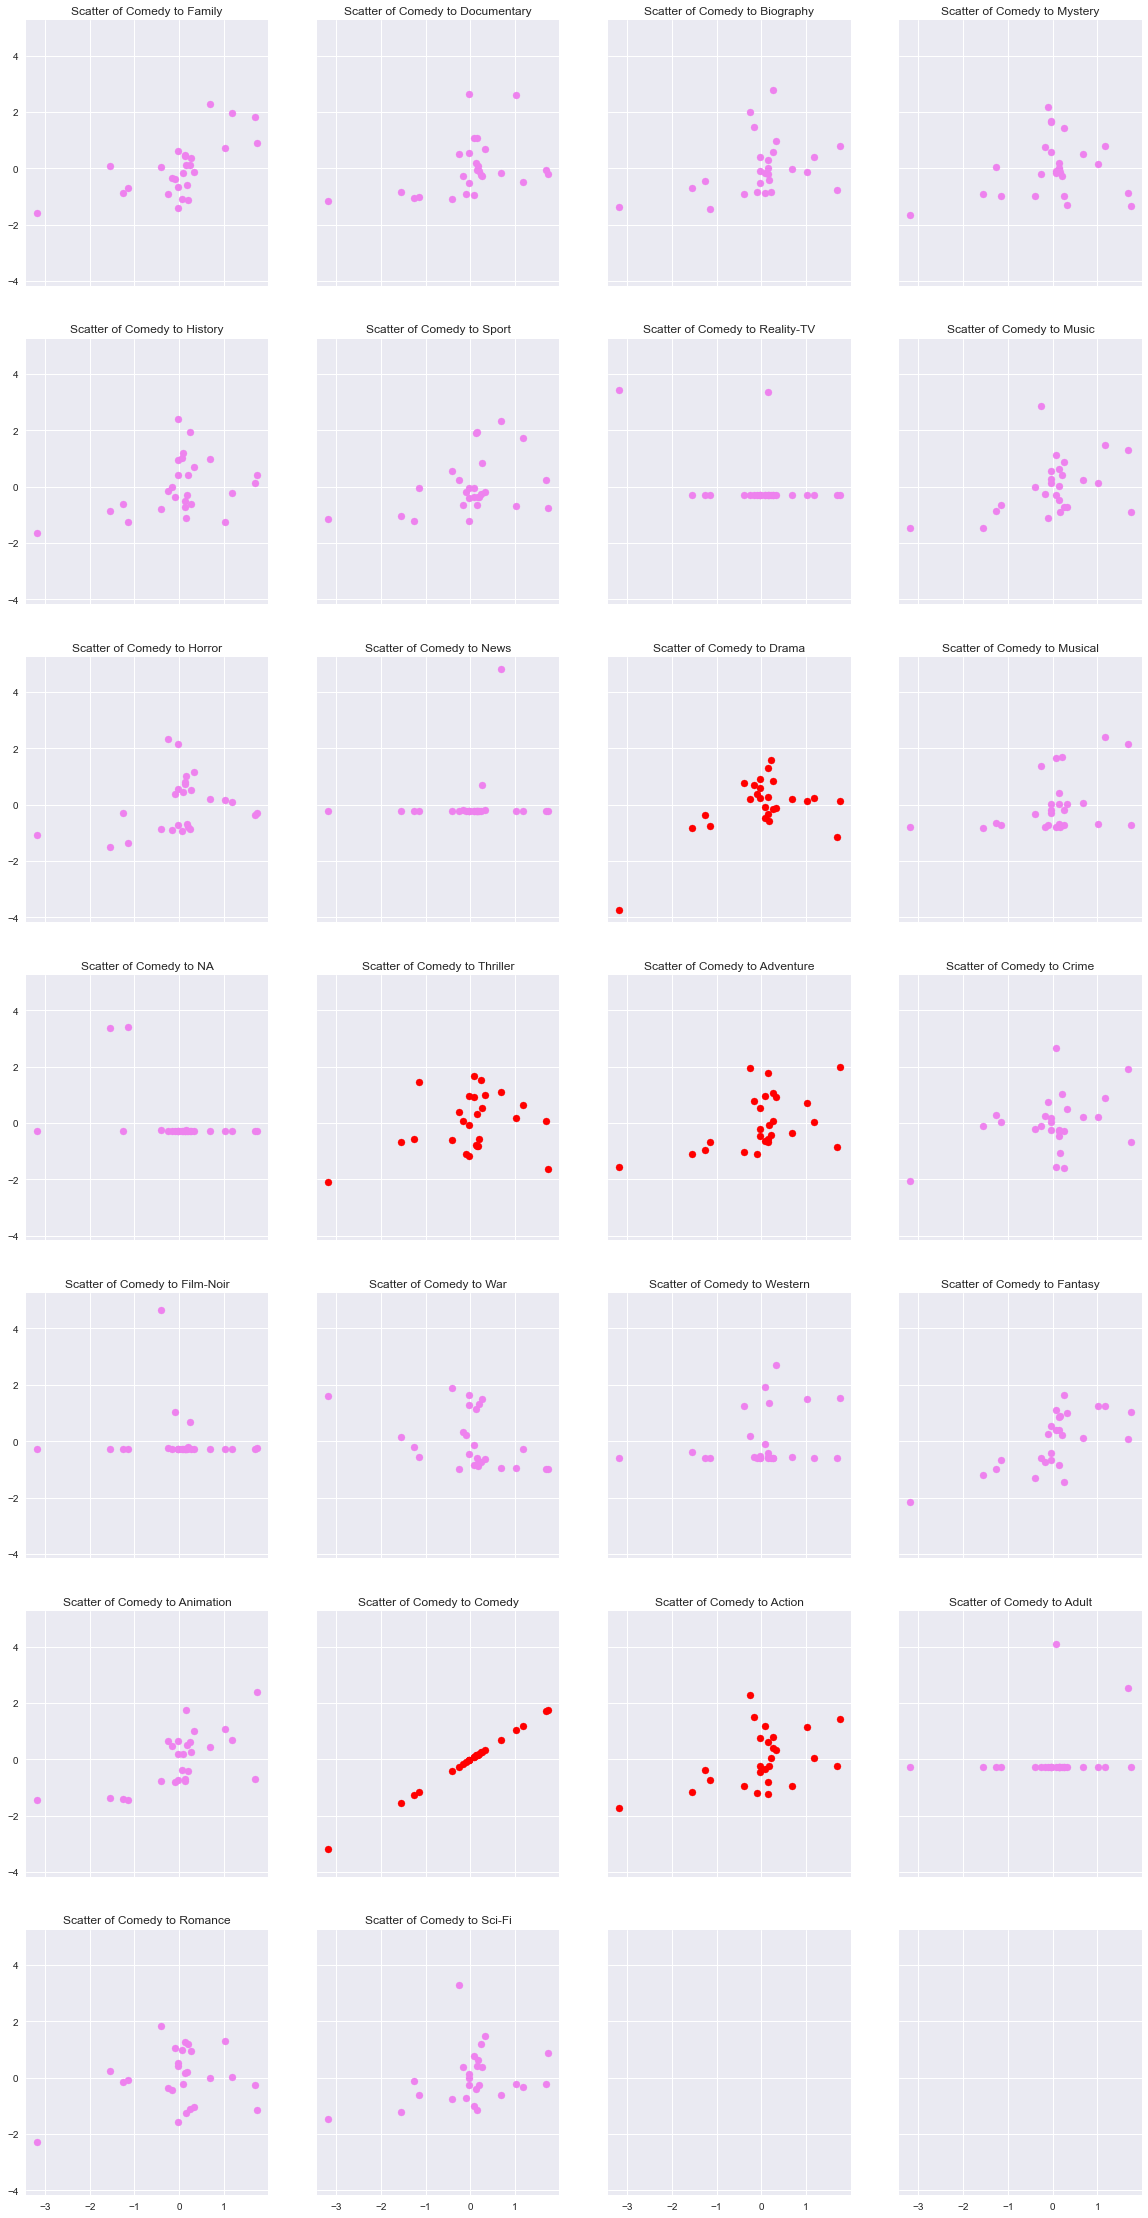

In [90]:
gross_genres_years_transpose = gross_genres_years.transpose()
gross_genres_years_transpose=(gross_genres_years_transpose-gross_genres_years_transpose.mean())/gross_genres_years_transpose.std()

tmp_genres = set(top_genres)

cols = 4
size=20
fig, axes = plt.subplots(len(gross_genres_years_transpose)//cols+1,cols, figsize=(size,size*2),sharex=True,sharey=True)
for i, genre in enumerate(genres):
    pos = (i//cols,i%cols)
    if genre in tmp_genres: color = "red"
    else: color="violet"
    axes[pos].scatter(gross_genres_years_transpose["Comedy"],gross_genres_years_transpose[genre],color=color)
    axes[pos].title.set_text(f"Scatter of Comedy to {genre}")

## Keysights from the figure above
We can see that some genres are scattered wildy when others are a little more organized. There is really not much we can learn from seeing so we'll use a pearson correlation table to learn more.

In [97]:
genres_correlation = gross_genres_years_transpose.corr()
genres_correlation["Comedy"].sort_values(ascending=False)

Comedy         1.000000
Fantasy        0.684664
Family         0.655677
Animation      0.642749
Drama          0.533178
Adventure      0.468382
Action         0.453613
Music          0.424927
Musical        0.405143
Documentary    0.386031
History        0.385761
Crime          0.377645
Sport          0.364176
Biography      0.347215
Sci-Fi         0.309467
Horror         0.281468
Thriller       0.262583
Western        0.252880
Romance        0.217918
Adult          0.203865
Mystery        0.202418
News           0.152881
Film-Noir     -0.070298
NA            -0.398535
War           -0.419424
Reality-TV    -0.451767
Name: Comedy, dtype: float64

To our surprise There were few more correlated genres to Comedy than Drama. We'll scatter plot Fantasy, Drama, and Film-Noir as they are the most, our suspect and the least correlated.

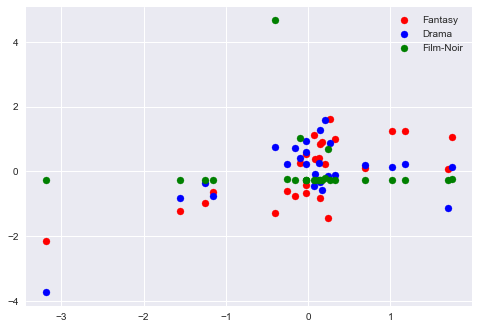

In [104]:
    plt.scatter(gross_genres_years_transpose["Comedy"],gross_genres_years_transpose["Fantasy"])
    plt.scatter(gross_genres_years_transpose["Comedy"],gross_genres_years_transpose["Drama"])
    plt.scatter(gross_genres_years_transpose["Comedy"],gross_genres_years_transpose["Film-Noir"])
    plt.legend(["Fantasy","Drama","Film-Noir"])
